In [28]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import re

# Load the data
emotion_data = pd.read_csv('emotion_2.csv')
transcript_data = pd.read_csv('transcriptscores_2.csv',delimiter = ',')
transcript_text = pd.read_csv('transcripttext_2.txt', delimiter='\t', header=None, names=['text'])
gaze_data = pd.read_csv('gaze_2.csv')
metadata = pd.read_csv('metadata_2.csv')
# Load transcript text
with open('transcripttext_2.txt', 'r') as file:
    transcript_text1= file.read()

# Combine transcript data
transcript_data['text'] = transcript_text['text']

def analyze_emotions(emotion_data):
    emotion_summary = emotion_data[['angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral']].mean()
    dominant_emotion = emotion_summary.idxmax()
    
    emotion_variance = emotion_data[['angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral']].var()
    emotional_range = emotion_variance.sum()
    
    return emotion_summary, dominant_emotion, emotional_range

def analyze_speech(transcript_data):
    speech_speed = transcript_data['speech_speed'].mean()
    confidence = transcript_data['confident'].mean()
    conciseness = transcript_data['concise'].mean()
    enthusiasm = transcript_data['enthusiastic'].mean()
    
    return speech_speed, confidence, conciseness, enthusiasm

def analyze_sentiment(transcript_data):
    sentiment_scores = transcript_data[['positive', 'negative', 'neutral']].mean()
    overall_sentiment = sentiment_scores.idxmax()
    
    return sentiment_scores, overall_sentiment

def analyze_gaze(gaze_data):
    gaze_percentage = (gaze_data['gaze'] == 1).mean() * 100
    blink_rate = gaze_data['blink'].mean()
    avg_eye_offset = gaze_data['eye_offset'].abs().mean()
    
    return gaze_percentage, blink_rate, avg_eye_offset

def analyze_metadata(metadata):
    total_duration = metadata['elapsed_time'].max()
    avg_distance = metadata['distance'].mean()
    
    return total_duration, avg_distance

def generate_insights(emotion_data, transcript_data, gaze_data, metadata):
    emotion_summary, dominant_emotion, emotional_range = analyze_emotions(emotion_data)
    speech_speed, confidence, conciseness, enthusiasm = analyze_speech(transcript_data)
    sentiment_scores, overall_sentiment = analyze_sentiment(transcript_data)
    gaze_percentage, blink_rate, avg_eye_offset = analyze_gaze(gaze_data)
    total_duration, avg_distance = analyze_metadata(metadata)
    
    insights = {
        "Dominant Emotion": dominant_emotion,
        "Emotional Range": emotional_range,
        "Average Speech Speed": speech_speed,
        "Average Confidence": confidence,
        "Average Conciseness": conciseness,
        "Average Enthusiasm": enthusiasm,
        "Overall Sentiment": overall_sentiment,
        "Gaze Percentage": gaze_percentage,
        "Blink Rate": blink_rate,
        "Average Eye Offset": avg_eye_offset,
        "Total Duration": total_duration,
        "Average Distance": avg_distance
    }
    
    return insights

def plot_emotion_timeline(emotion_data):
    plt.figure(figsize=(12, 6))
    for emotion in ['angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral']:
        plt.plot(emotion_data['image_seq'], emotion_data[emotion], label=emotion)
    
    plt.title("Emotion Timeline")
    plt.xlabel("Video Timeline")
    plt.ylabel("Emotion Intensity")
    plt.legend()
    plt.savefig('emotion_timeline.png')
    plt.close()

def plot_speech_characteristics(transcript_data):
    characteristics = ['confident', 'concise', 'enthusiastic', 'speech_speed']
    
    fig, axs = plt.subplots(2, 2, figsize=(12, 10))
    fig.suptitle("Speech Characteristics Over Time")
    
    for i, characteristic in enumerate(characteristics):
        ax = axs[i // 2, i % 2]
        ax.plot(transcript_data['start'], transcript_data[characteristic])
        ax.set_title(characteristic.capitalize())
        ax.set_xlabel("Time (seconds)")
        ax.set_ylabel("Score")
    
    plt.tight_layout()
    plt.savefig('speech_characteristics.png')
    plt.close()

def plot_gaze_analysis(gaze_data):
    plt.figure(figsize=(12, 6))
    plt.plot(gaze_data['image_seq'], gaze_data['gaze'], label='Gaze')
    plt.plot(gaze_data['image_seq'], gaze_data['eye_offset'], label='Eye Offset')
    plt.title("Gaze and Eye Offset Over Time")
    plt.xlabel("Video Timeline")
    plt.ylabel("Value")
    plt.legend()
    plt.savefig('gaze_analysis.png')
    plt.close()

def get_word_frequency(text, top_n=50):
    words = re.findall(r'\w+', text.lower())
    return Counter(words).most_common(top_n)

def identify_expertise_areas(text, keywords):
    text_lower = text.lower()
    expertise_scores = {}
    for area, words in keywords.items():
        score = sum(text_lower.count(word) for word in words)
        expertise_scores[area] = score
    return expertise_scores

# Generate insights
insights = generate_insights(emotion_data, transcript_data, gaze_data, metadata)

# Generate plots
plot_emotion_timeline(emotion_data)
plot_speech_characteristics(transcript_data)
plot_gaze_analysis(gaze_data)

# Print insights
print("Candidate Analysis Insights:")
for key, value in insights.items():
    print(f"{key}: {value}")

print("\nPlots 'emotion_timeline.png', 'speech_characteristics.png', and 'gaze_analysis.png' have been generated.")
# Word frequency analysis

# Analyze transcript content
word_count = len(transcript_text1.split())
print(f"Word Count: {word_count}")

# List of stop words to remove
stop_words = ['i', 'and', 'to', 'the', 'a', 'in', 'of', 'is', 'this', 'my','you','at','am','an','have','be']

# Assuming `get_word_frequency` returns a list of tuples (word, count)
word_freq = get_word_frequency(transcript_text['text'].str.cat(sep=' '))

# Filter and print words that are not in stop_words
for word, count in word_freq:
    if word.lower() not in stop_words:  # Convert to lowercase for case-insensitive comparison
        print(f"{word}: {count}")


# Expertise areas based on word frequency
expertise_keywords = {
    "Regulatory Affairs": ["regulatory", "affairs", "pharmaceutical"],
    "Medical Writing": ["medical", "writer", "writing"],
    "Drug Safety": ["drug", "safety", "risk", "management"],
    "Research": ["research", "work", "patent", "publication"],
    "Biotechnology": ["biotechnology", "tech"],
    "Management": ["management", "postgraduate","business"]
}

expertise_areas = identify_expertise_areas(transcript_text['text'].str.cat(sep=' '), expertise_keywords)
print("\nExpertise areas based on keyword frequency:")
for area, score in sorted(expertise_areas.items(), key=lambda x: x[1], reverse=True):
    print(f"{area}: {score}")
    




Candidate Analysis Insights:
Dominant Emotion: happy
Emotional Range: 4494.361343361616
Average Speech Speed: 3.269092112382821
Average Confidence: 0.6848793406235544
Average Conciseness: 0.4842210235564332
Average Enthusiasm: 0.5166850976253811
Overall Sentiment: positive
Gaze Percentage: 60.91954022988506
Blink Rate: 0.04597701149425287
Average Eye Offset: 23.22104252873563
Total Duration: 90.0
Average Distance: 0.0

Plots 'emotion_timeline.png', 'speech_characteristics.png', and 'gaze_analysis.png' have been generated.
Word Count: 294
beside: 3
for: 3
internship: 3
with: 3
startup: 3
so: 3
opportunity: 2
2022: 2
can: 2
team: 2
according: 2
interned: 2
was: 2
venture: 2
network: 2
on: 2
providing: 2
startups: 2
what: 2
investor: 2
should: 2
business: 2
model: 2
s: 2
perspective: 2
hello: 1
cameron: 1
barajas: 1
thrilled: 1
apply: 1
today: 1
recently: 1
completed: 1
bba: 1

Expertise areas based on keyword frequency:
Research: 5
Management: 2
Biotechnology: 1
Regulatory Affairs: 0
Med

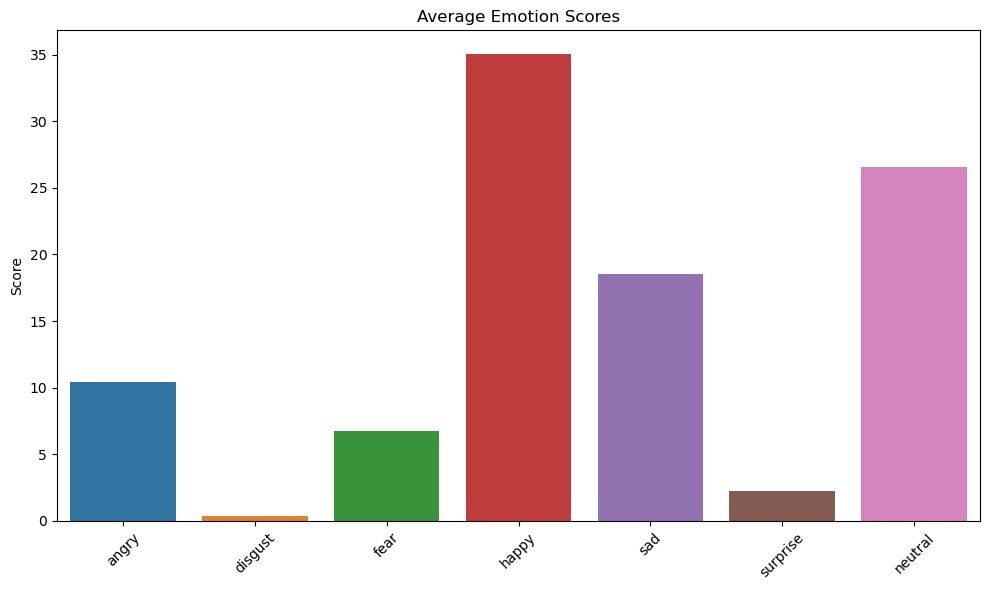

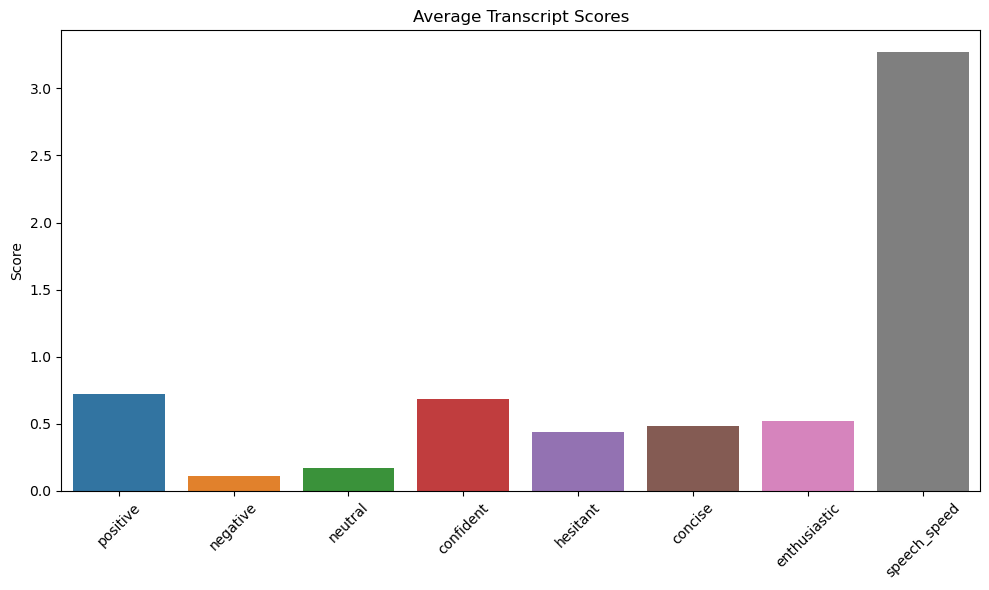

Camera Focus: 60.92% of the time
Average Speech Speed: 3.27
Dominant Emotion: happy
Word Count: 294
Key Topics: am
Video Duration: 90.00 seconds
Average Distance: 0.00


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

# Load the datasets
emotion_df = pd.read_csv('emotion_2.csv')
gaze_df = pd.read_csv('gaze_2.csv')
transcript_df = pd.read_csv('transcriptscores_2.csv')
metadata_df = pd.read_csv('metadata_2.csv')

# Load transcript text
with open('transcripttext_2.txt', 'r') as file:
    transcript_text = file.read()

# Merge datasets
merged_df = pd.merge(emotion_df, gaze_df, on=['movie_id', 'image_seq'])
merged_df = pd.merge(merged_df, transcript_df, left_on='image_seq', right_on='id', how='left')
merged_df = pd.merge(merged_df, metadata_df, on=['movie_id', 'image_seq'])

# Calculate average emotion scores
avg_emotions = emotion_df[['angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral']].mean()

# Calculate percentage of time looking at the camera
camera_focus = (gaze_df['gaze'] == 1).mean() * 100

# Calculate average transcript scores
avg_transcript_scores = transcript_df[['positive', 'negative', 'neutral', 'confident', 'hesitant', 'concise', 'enthusiastic', 'speech_speed']].mean()

# Visualize emotion distribution
plt.figure(figsize=(10, 6))
sns.barplot(x=avg_emotions.index, y=avg_emotions.values)
plt.title('Average Emotion Scores')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Visualize transcript scores
plt.figure(figsize=(10, 6))
sns.barplot(x=avg_transcript_scores.index, y=avg_transcript_scores.values)
plt.title('Average Transcript Scores')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Print key findings
print(f"Camera Focus: {camera_focus:.2f}% of the time")
print(f"Average Speech Speed: {avg_transcript_scores['speech_speed']:.2f}")
print(f"Dominant Emotion: {emotion_df['dominant_emotion'].mode().values[0]}")

# Analyze transcript content
word_count = len(transcript_text.split())
print(f"Word Count: {word_count}")

# Extract key phrases or topics
words = transcript_text.lower().split()
word_freq = Counter(words)
common_words = [word for word, count in word_freq.most_common(10) if word not in ['i', 'and', 'to', 'the', 'a', 'in', 'of', 'is', 'this', 'my']]
print(f"Key Topics: {', '.join(common_words)}")

# Analyze video duration
video_duration = metadata_df['elapsed_time'].max()
print(f"Video Duration: {video_duration:.2f} seconds")

# Analyze distance (assuming it's relevant)
avg_distance = metadata_df['distance'].mean()
print(f"Average Distance: {avg_distance:.2f}")